## Training a CNN using CIFAR-10 Data

(1) Warm-up: Load the dataset and check how the images look like

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteK63OSW/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteK63OSW/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


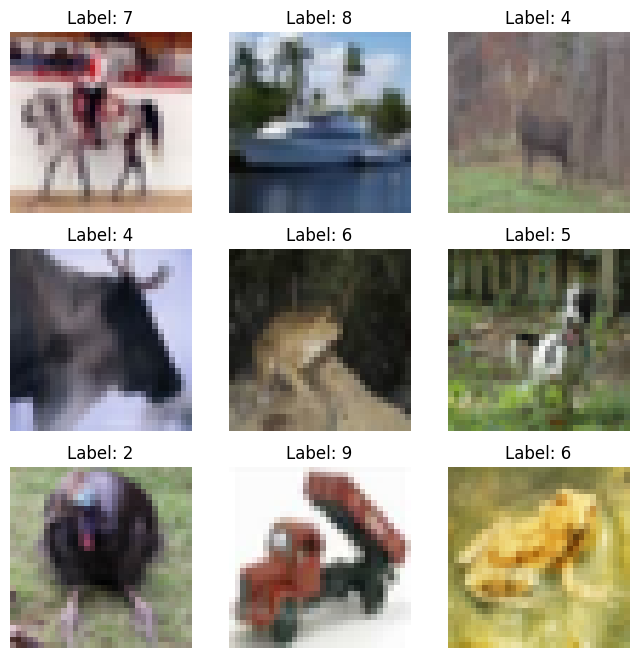

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
dataset, info = tfds.load('cifar10', split='train', with_info=True)

# Iterate over the dataset and visualize some images
fig = plt.figure(figsize=(8, 8))
for i, data in enumerate(dataset.take(9)): # Checking 9 images
    image = data['image']
    label = data['label']

    # Plot the image
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(image)
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.show()


(2) Train a CNN with three hidden convolutional layers that use the ReLU activation
function. Use 64 11×11 filters for the first layer, followed by 2×2 max pooling
(stride of 2). The next two convolutional layers will use 128 3×3 filters followed by
the ReLU activation function. Prior to the softmax layer, you should have an
average pooling layer that pools across the preceding feature map. Do not use a
pre-trained CNN. Train your model using all of the CIFAR-10 training data, and
evaluate your trained system on the CIFAR-10 test data. Display the training loss
as a function of epochs. 

What is the accuracy on the test data? How did you
initialize the weights? Discuss your architecture and hyper-parameters.

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1407/1407 [==============================] - 20s 7ms/step - loss: 1.6918 - accuracy: 0.3890 - val_loss: 1.4676 - val_accuracy: 0.4834
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3326 - accuracy: 0.5257 - val_loss: 1.2117 - val_accuracy: 0.5720
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1702 - accuracy: 0.5873 - val_loss: 1.1443 - val_accuracy: 0.5970
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0575 - accuracy: 0.6270 - val_loss: 1.0580 - val_accuracy: 0.6298
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9586 - accuracy: 0.6634 - val_loss: 1.0524 - val_accuracy: 0.6376
Epoch 6/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8754 - accuracy: 0.6926 - val_loss: 1.0300 - val_accuracy: 0.6462
Epoch 7/10
1407/1407 [==============================] - 9s 6ms/step 

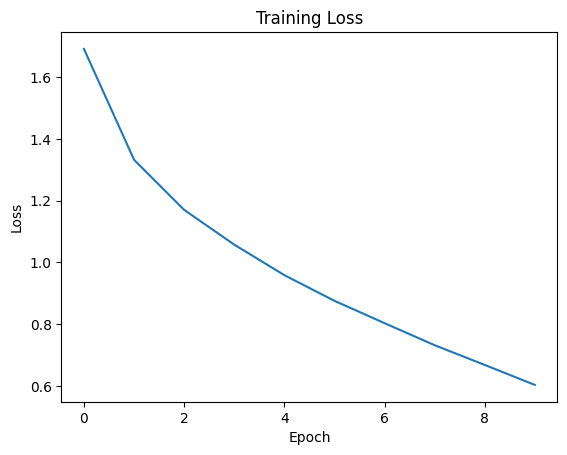

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Create the CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (11, 11), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test accuracy
print("Test accuracy:", test_acc)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


(i) **Weights Initialisation** : Using Glorot uniform initialization for dense layers and a variant of Glorot uniform initialization for convolutional layers.

(ii) **Architecture**:

- Input: The input images have a shape of (32, 32, 3), representing 32x32-pixel RGB images.

- Convolutional Layers:

*First Convolutional Layer: It consists of 64 filters of size 11x11, followed by ReLU activation. The 'same' padding is used to preserve the spatial dimensions of the input.

*Max Pooling Layer: A 2x2 max pooling layer with a stride of 2 is applied to downsample the feature maps.

*Second and Third Convolutional Layers: They both have 128 filters of size 3x3, followed by ReLU activation. Again, 'same' padding is used.

*Average Pooling Layer: A 2x2 average pooling layer is applied to pool across the preceding feature map.

*Flatten: The feature maps are flattened into a 1D vector.

*Dense Layer: A fully connected layer with 10 units (corresponding to the 10 classes in CIFAR-10) and softmax activation function is added as the final output layer.


(iii) **Hyperparameters**:

*Optimizer: The model is compiled with the Adam optimizer, which is a popular choice for training neural networks. Adam adapts the learning rate during training and combines the advantages of both AdaGrad and RMSProp optimizers.

*Loss Function: The sparse categorical cross-entropy loss function is used, as it is suitable for multi-class classification tasks with integer labels (as in CIFAR-10).

*Metrics: The accuracy metric is used to evaluate the model's performance during training and testing.

*Epochs: The model is trained for 10 epochs, meaning it goes through the entire training dataset 10 times.

*Batch Size: The default batch size is used, which is determined by the Keras framework.

*Validation Split: During training, a validation set of 10% of the training data is used to monitor the model's performance and prevent overfitting.

----------

(3) Visualize all of the 11×11×3 filters learned by the first convolutional layer as an
RGB image array (I suggest making a large RGB image that is made up of each
of the smaller images, so it will have 4 rows and 16 columns). Note that you will
need to normalize each filter by contrast stretching to do this visualization, i.e.,
for each filter subtract the smallest value and then divide by the new largest
value.

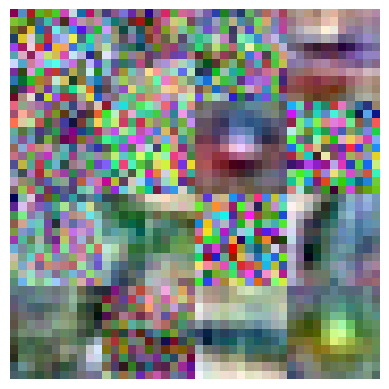

In [ ]:
import numpy as np

# Get the weights of the first convolutional layer
conv1_weights = model.layers[0].get_weights()[0]

# Normalize each filter by contrast stretching
normalized_filters = []
for i in range(conv1_weights.shape[3]):
    filter_weights = conv1_weights[:, :, :, i]
    min_val = np.min(filter_weights)
    max_val = np.max(filter_weights)
    normalized_filter = (filter_weights - min_val) / (max_val - min_val)
    normalized_filters.append(normalized_filter)

# Create a large RGB image array
image_rows = []
for i in range(0, 4):
    image_row = np.hstack(normalized_filters[i*4: (i+1)*4])
    image_rows.append(image_row)
rgb_image_array = np.vstack(image_rows)

# Plot the RGB image array
plt.imshow(rgb_image_array)
plt.axis('off')
plt.show()


(4) Using the same architecture, add in batch normalization between each of the
hidden layers. Compare the training loss with and without batch normalization as
a function of epochs. What is the final test error? Visualize the filters

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Create the CNN model with batch normalization
model = models.Sequential()
model.add(layers.Conv2D(64, (11, 11), padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.AveragePooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


313/313 [==============================] - 1s 4ms/step - loss: 0.9738 - accuracy: 0.7010
Test accuracy without batch normalization: 0.684499979019165
Test accuracy with batch normalization: 0.7009999752044678


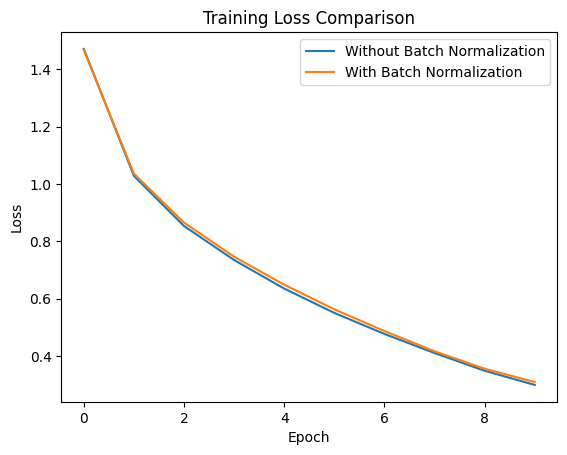

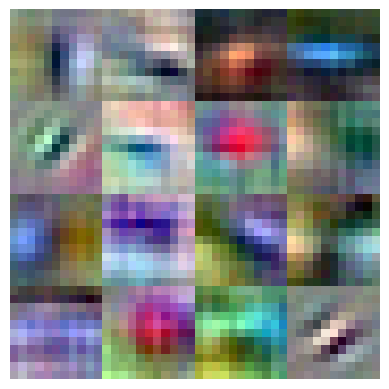

In [ ]:

# Train the model without batch normalization
history_without_bn = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=0)

# Create a new model with batch normalization
model_bn = models.clone_model(model)
model_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model with batch normalization
history_with_bn = model_bn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=0)

# Evaluate the models on the test data
test_loss_without_bn, test_acc_without_bn = model.evaluate(test_images, test_labels)
test_loss_with_bn, test_acc_with_bn = model_bn.evaluate(test_images, test_labels)

# Print the test accuracy
print("Test accuracy without batch normalization:", test_acc_without_bn)
print("Test accuracy with batch normalization:", test_acc_with_bn)

# Plot the training loss with and without batch normalization
plt.plot(history_without_bn.history['loss'], label='Without Batch Normalization')
plt.plot(history_with_bn.history['loss'], label='With Batch Normalization')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the weights of the first convolutional layer
conv1_weights = model_bn.layers[0].get_weights()[0]

# Normalize each filter by contrast stretching
normalized_filters = []
for i in range(conv1_weights.shape[3]):
    filter_weights = conv1_weights[:, :, :, i]
    min_val = np.min(filter_weights)
    max_val = np.max(filter_weights)
    normalized_filter = (filter_weights - min_val) / (max_val - min_val)
    normalized_filters.append(normalized_filter)

# Create a large RGB image array
image_rows = []
for i in range(0, 4):
    image_row = np.hstack(normalized_filters[i*4: (i+1)*4])
    image_rows.append(image_row)
rgb_image_array = np.vstack(image_rows)

# Plot the RGB image array
plt.imshow(rgb_image_array)
plt.axis('off')
plt.show()
